# **Practice 18 - Web Scraping**

#### **WRITE YOUR NAME HERE**

---

**IMPORTANT**:
- Before starting the lab, save a copy to your google drive by navigating to `File > Save a copy in Drive` <br>

<br>


**Instructions**: Complete the lab below.

- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---

<br>

####<font color=red>Organized</font>

**Answers should be organized in the following format for organization and readability**


<font color=red>Example task 1</font>

In [ ]:
# 1.

# This will be the code block to answer the first part of a task

1. This will be the text answer/explanation (if prompted) for the first task

<font color=red>Example task 2</font>

In [ ]:
# 2.

# This will be the code block to answer the second part of a task

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>

#### Packages

In [2]:
# already installed on colab
library(rvest)

<br>

<br>

<br>

---

####<font color=red>Task 1</font>

<font color=red>Task 1.1</font>

* Load the same HTML file from lecture (url below) using the `read_html()` function

  https://rvest.tidyverse.org/articles/starwars.html

* Show the contents of the HTML using the `cat()` and `as.character()` functions

In [63]:
#1.1
html_page <-read_html("https://rvest.tidyverse.org/articles/starwars.html")
cat(as.character(html_page))

<!DOCTYPE html>
<!-- Generated by pkgdown: do not edit by hand --><html lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
<meta name="description" content="rvest">
<title>Star Wars films • rvest</title>
<!-- favicons --><link rel="icon" type="image/png" sizes="16x16" href="../favicon-16x16.png">
<link rel="icon" type="image/png" sizes="32x32" href="../favicon-32x32.png">
<link rel="apple-touch-icon" type="image/png" sizes="180x180" href="../apple-touch-icon.png">
<link rel="apple-touch-icon" type="image/png" sizes="120x120" href="../apple-touch-icon-120x120.png">
<link rel="apple-touch-icon" type="image/png" sizes="76x76" href="../apple-touch-icon-76x76.png">
<link rel="apple-touch-icon" type="image/png" sizes="60x60" href="../apple-touch-icon-60x60.png">
<script src="../deps/jquery-3.6.0/

<br>

<font color=red>Task 1.2</font>

* Extract the HTML elements with the `<section>` tag and store as the variable `section_elements`

* How many section elements are there?

In [12]:
#1.2
section_elements <- html_element(html_page,"section")
length(section_elements)

[1] 2

<br>

<font color=red>Task 1.3</font>

* Extract the attribute values of the `data-id` attribute from the `h2` tags and store as the variable `movie_id`

  Hint: Your result should be a character vector of the numbers `1`, `2`, `3`, `4`, `5`, `6`, `7`

In [30]:
#1.3
h2_elements <- html_elements(html_page, "h2")

movie_id <- html_attr(h2_elements, "data-id")
movie_id


[1] "1" "2" "3" "4" "5" "6" "7" NA

<br>

<font color=red>Task 1.4</font>

* Extract the movie titles from the `h2` tags using the `html_text()` function and store as the variable `movie_title`.

  Be sure to remove the white space in the titles.

In [31]:
#1.4
movie_title <- trimws(html_text(h2_elements))
movie_title

[1] "The Phantom Menace"      "Attack of the Clones"   
[3] "Revenge of the Sith"     "A New Hope"             
[5] "The Empire Strikes Back" "Return of the Jedi"     
[7] "The Force Awakens"       "On this page"

<br>

<font color=red>Task 1.5</font>

* Extract the director of each movie from the `<span>` tag and store as a character vector names `director`

In [34]:
#1.5
sections_elements <- html_elements(html_page, "section")

director <- sections_elements |>
  html_element("span") |>
  html_text() |>
  sub("Director: ", "", x = _)
director


[1] "George Lucas"     "George Lucas"     "George Lucas"     "George Lucas"    
[5] "Irvin Kershner"   "Richard Marquand" "J. J. Abrams"

<br>

<br>

<br>

---

####<font color=red>Task 2</font>

<font color=red>Task 2.1</font>

* Extract the elements from the `<p>` tags using the `html_elements()` function and store as the variable `p_elements`

* What content is included in the `<p>` elements?

In [36]:
#2.1
p_elements <- html_elements(html_page,"p")
p_elements

{xml_nodeset (38)}
 [1] <p>This vignette contains some data about the Star Wars films for use in ...
 [2] <p>\nReleased: 1999-05-19\n</p>
 [3] <p>\nDirector: <span class="director">George Lucas</span>\n</p>
 [4] <p>\nTurmoil has engulfed the Galactic Republic. The taxation of trade r ...
 [5] <p>\nHoping to resolve the matter with a blockade of deadly battleships, ...
 [6] <p>\nWhile the Congress of the Republic endlessly debates this alarming  ...
 [7] <p>\nReleased: 2002-05-16\n</p>
 [8] <p>\nDirector: <span class="director">George Lucas</span>\n</p>
 [9] <p>\nThere is unrest in the Galactic Senate. Several thousand solar syst ...
[10] <p>\nThis separatist movement, under the leadership of the mysterious Co ...
[11] <p>\nSenator Amidala, the former Queen of Naboo, is returning to the Gal ...
[12] <p>\nReleased: 2005-05-19\n</p>
[13] <p>\nDirector: <span class="director">George Lucas</span>\n</p>
[14] <p>\nWar! The Republic is crumbling under attacks by the ruthless Sith L ...
[15] <p

<br>

<font color=red>Task 2.2</font>

* Extract all elements in `p_elements` that contain a movie release date and store as the variable `date_elements`

  Hint: You can use the `grepl()` function to extract all lines of `p_elements` that have the pattern `"Released:"`


In [42]:
#2.2
p_text <- html_text(p_elements)

date_elements <- trimws(p_text[grepl("Released:", p_text)])
date_elements



[1] "Released: 1999-05-19" "Released: 2002-05-16" "Released: 2005-05-19"
[4] "Released: 1977-05-25" "Released: 1980-05-17" "Released: 1983-05-25"
[7] "Released: 2015-12-11"

<br>

<font color=red>Task 2.3</font>

* Extract the text containing the date information from each of the `date_elements` and store as the variable `release_date`


In [46]:
#2.3
release_date <- gsub("Released: ", "", date_elements)
release_date

[1] "1999-05-19" "2002-05-16" "2005-05-19" "1977-05-25" "1980-05-17"
[6] "1983-05-25" "2015-12-11"

<br>

<font color=red>Task 2.4</font>

* Remove the pattern `Released: ` from the strings in the variable `release_date`. Overwrite the variable `release_date` with your result.

  Hint: Use `gsub()` to replace `"Released: "` with an empty string `""`


In [47]:
#2.4
release_date <- gsub("Released: ", "", date_elements)
release_date

[1] "1999-05-19" "2002-05-16" "2005-05-19" "1977-05-25" "1980-05-17"
[6] "1983-05-25" "2015-12-11"

<br>

<br>

<br>

---

####<font color=red>Task 3</font>

<font color=red>Task 3.1</font>

* Extract the elements from the class `"crawl"` and store as the variable `crawl_elements`

* What is contained within these elements?

In [52]:
#3.1
crawl_elements <- html_elements(html_page, ".crawl")
crawl_elements

{xml_nodeset (7)}
[1] <div class="crawl">\n<p>\nTurmoil has engulfed the Galactic Republic. The ...
[2] <div class="crawl">\n<p>\nThere is unrest in the Galactic Senate. Several ...
[3] <div class="crawl">\n<p>\nWar! The Republic is crumbling under attacks by ...
[4] <div class="crawl">\n<p>\nIt is a period of civil war. Rebel spaceships,  ...
[5] <div class="crawl">\n<p>\nIt is a dark time for the Rebellion. Although t ...
[6] <div class="crawl">\n<p>\nLuke Skywalker has returned to his home planet  ...
[7] <div class="crawl">\n<p>\nLuke Skywalker has vanished. In his absence, th ...

<br>

<font color=red>Task 3.2</font>

* Extract the text from the `crawl_elements` variable as store as the variable `description`

In [55]:
#3.2
description <- html_text(crawl_elements)
description

[1] "\n\nTurmoil has engulfed the Galactic Republic. The taxation of trade routes\nto outlying star systems is in dispute.\n\n\nHoping to resolve the matter with a blockade of deadly battleships, the\ngreedy Trade Federation has stopped all shipping to the small planet of\nNaboo.\n\n\nWhile the Congress of the Republic endlessly debates this alarming chain\nof events, the Supreme Chancellor has secretly dispatched two Jedi\nKnights, the guardians of peace and justice in the galaxy, to settle the\nconflict….\n\n"          
[2] "\n\nThere is unrest in the Galactic Senate. Several thousand solar systems\nhave declared their intentions to leave the Republic.\n\n\nThis separatist movement, under the leadership of the mysterious Count\nDooku, has made it difficult for the limited number of Jedi Knights to\nmaintain peace and order in the galaxy.\n\n\nSenator Amidala, the former Queen of Naboo, is returning to the Galactic\nSenate to vote on the critical issue of creating an ARMY OF THE REPUBLIC\nto assist the overwhelmed Jedi….\n\n"             
[3] "\n\nWar! The Republic is crumbling under attacks by the ruthless Sith Lord,\nCount Dooku. There are heroes on both sides. Evil is everywhere.\n\n\nIn a stunning move, the fiendish droid leader, General Grievous, has\nswept into the Republic capital and kidnapped Chancellor Palpatine,\nleader of the Galactic Senate.\n\n\nAs the Separatist Droid Army attempts to flee the besieged capital with\ntheir valuable hostage, two Jedi Knights lead a desperate mission to\nrescue the captive Chancellor….\n\n"                     
[4] "\n\nIt is a period of civil war. Rebel spaceships, striking from a hidden\nbase, have won their first victory against the evil Galactic Empire.\n\n\nDuring the battle, Rebel spies managed to steal secret plans to the\nEmpire’s ultimate weapon, the DEATH STAR, an armored space station with\nenough power to destroy an entire planet.\n\n\nPursued by the Empire’s sinister agents, Princess Leia races home aboard\nher starship, custodian of the stolen plans that can save her people and\nrestore freedom to the galaxy….\n\n"
[5] "\n\nIt is a dark time for the Rebellion. Although the Death Star has been\ndestroyed, Imperial troops have driven the Rebel forces from their\nhidden base and pursued them across the galaxy.\n\n\nEvading the dreaded Imperial Starfleet, a group of freedom fighters led\nby Luke Skywalker has established a new secret base on the remote ice\nworld of Hoth.\n\n\nThe evil lord Darth Vader, obsessed with finding young Skywalker, has\ndispatched thousands of remote probes into the far reaches of space….\n\n"                 
[6] "\n\nLuke Skywalker has returned to his home planet of Tatooine in an attempt\nto rescue his friend Han Solo from the clutches of the vile gangster\nJabba the Hutt.\n\n\nLittle does Luke know that the GALACTIC EMPIRE has secretly begun\nconstruction on a new armored space station even more powerful than the\nfirst dreaded Death Star.\n\n\nWhen completed, this ultimate weapon will spell certain doom for the\nsmall band of rebels struggling to restore freedom to the galaxy…\n\n"                                          
[7] "\n\nLuke Skywalker has vanished. In his absence, the sinister FIRST ORDER\nhas risen from the ashes of the Empire and will not rest until\nSkywalker, the last Jedi, has been destroyed. With the support of the\nREPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate\nto find her brother Luke and gain his help in restoring peace and\njustice to the galaxy. Leia has sent her most daring pilot on a secret\nmission to Jakku, where an old ally has discovered a clue to Luke’s\nwhereabouts….\n\n"

<br>

<font color=red>Task 3.3</font>

* Create a data frame named `star_wars_list` with the following columns

  * `movie_id` from Task 1.3

  * `movie_title` from Task 1.4

  * `director` from Task 1.5

  * `release_date` from Task 2.4

  * `description` from Task 3.2

In [58]:
#3.3
length(movie_id)
length(movie_title)
length(director)
length(release_date)
length(description)


[1] 8

[1] 8

[1] 7

[1] 7

[1] 7

In [59]:
#3.3
movie_id <- movie_id[1:7]
movie_title <- movie_title[1:7]

In [61]:
#3.3
star_wars_df <- data.frame(
  movie_id = movie_id,
  movie_title = movie_title,
  director = director,
  release_date = release_date,
  description = description,
  stringsAsFactors = FALSE
)


<br>

<font color=red>Task 3.4</font>

* Confirm that your `star_wars_list` data frame appears in the format below

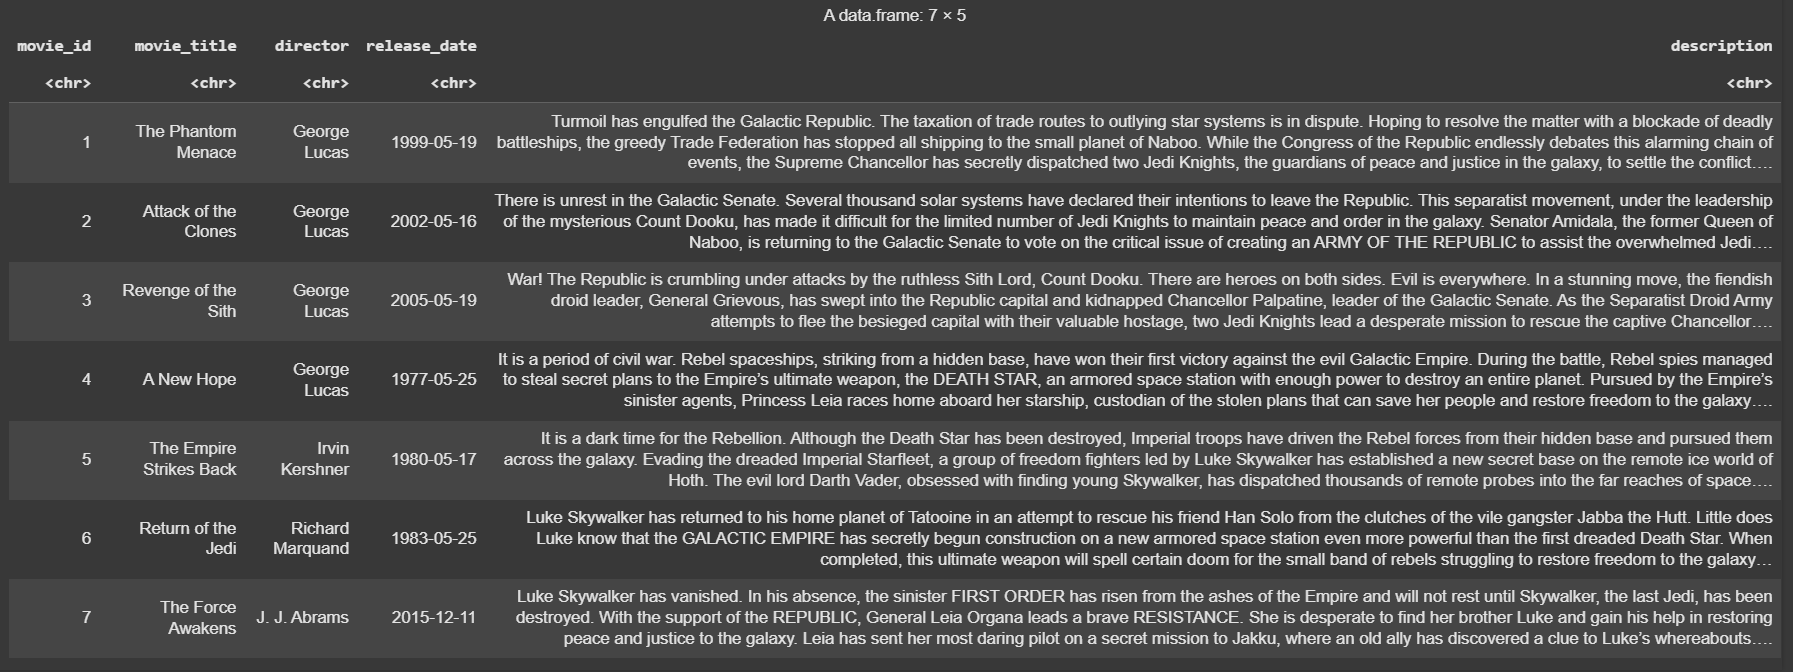

In [62]:
#3.4
star_wars_df

movie_id,movie_title,director,release_date,description
<chr>,<chr>,<chr>,<chr>,<chr>
1,The Phantom Menace,George Lucas,1999-05-19,"Turmoil has engulfed the Galactic Republic. The taxation of trade routes to outlying star systems is in dispute. Hoping to resolve the matter with a blockade of deadly battleships, the greedy Trade Federation has stopped all shipping to the small planet of Naboo. While the Congress of the Republic endlessly debates this alarming chain of events, the Supreme Chancellor has secretly dispatched two Jedi Knights, the guardians of peace and justice in the galaxy, to settle the conflict…."
2,Attack of the Clones,George Lucas,2002-05-16,"There is unrest in the Galactic Senate. Several thousand solar systems have declared their intentions to leave the Republic. This separatist movement, under the leadership of the mysterious Count Dooku, has made it difficult for the limited number of Jedi Knights to maintain peace and order in the galaxy. Senator Amidala, the former Queen of Naboo, is returning to the Galactic Senate to vote on the critical issue of creating an ARMY OF THE REPUBLIC to assist the overwhelmed Jedi…."
3,Revenge of the Sith,George Lucas,2005-05-19,"War! The Republic is crumbling under attacks by the ruthless Sith Lord, Count Dooku. There are heroes on both sides. Evil is everywhere. In a stunning move, the fiendish droid leader, General Grievous, has swept into the Republic capital and kidnapped Chancellor Palpatine, leader of the Galactic Senate. As the Separatist Droid Army attempts to flee the besieged capital with their valuable hostage, two Jedi Knights lead a desperate mission to rescue the captive Chancellor…."
4,A New Hope,George Lucas,1977-05-25,"It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire. During the battle, Rebel spies managed to steal secret plans to the Empire’s ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet. Pursued by the Empire’s sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy…."
5,The Empire Strikes Back,Irvin Kershner,1980-05-17,"It is a dark time for the Rebellion. Although the Death Star has been destroyed, Imperial troops have driven the Rebel forces from their hidden base and pursued them across the galaxy. Evading the dreaded Imperial Starfleet, a group of freedom fighters led by Luke Skywalker has established a new secret base on the remote ice world of Hoth. The evil lord Darth Vader, obsessed with finding young Skywalker, has dispatched thousands of remote probes into the far reaches of space…."
6,Return of the Jedi,Richard Marquand,1983-05-25,"Luke Skywalker has returned to his home planet of Tatooine in an attempt to rescue his friend Han Solo from the clutches of the vile gangster Jabba the Hutt. Little does Luke know that the GALACTIC EMPIRE has secretly begun construction on a new armored space station even more powerful than the first dreaded Death Star. When completed, this ultimate weapon will spell certain doom for the small band of rebels struggling to restore freedom to the galaxy…"
7,The Force Awakens,J. J. Abrams,2015-12-11,"Luke Skywalker has vanished. In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed. With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy. Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke’s whereabouts…."


<br>

<br>

<br>

---

####<font color=red>Task 4</font>

<font color=red>Task 4.1</font>

* Load the HTML file from the following url:

  https://en.wikipedia.org/wiki/San_Diego_State_University


In [65]:
#4.1
html_page_sdsu <-read_html("https://en.wikipedia.org/wiki/San_Diego_State_University")
cat(as.character(html_page))

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta charset="UTF-8">
<title>San Diego State University - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-lim

<br>

<font color=red>Task 4.2</font>

* Use the `html_table()` function to load all tables from the HTML document and store as the variable `sdsu_tables`

* How many tables are included in the `sdsu_tables` variable?

In [70]:
##4.2
sdsu_tables <- html_table(html_page_sdsu)
length(sdsu_tables)

[1] 20

<br>

<font color=red>Task 4.3</font>

* Extract the second table from the variable `sdsu_tables` and store as the variable `cohorts`

* What type of information is contained within this table?

In [71]:
#4.3
cohorts <- sdsu_tables[[2]]
head(cohorts)

Var.1,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Applicants,"82,691","76,821","67,602","64,700","69,713","68,897","60,554","60,545","58,898","56,759","54,320"
Admits,"28,344","30,231","25,610","23,711","23,685","23,676","21,311","20,858","20,204","19,524","20,183"
% Admitted,34.3,39.4,37.9,36.6,34.0,34.4,35.2,34.5,34.3,34.4,37.2
Enrolled,"6,095","6,514","5,236","4,798","5,210","5,680","5,301","5,011","5,142","4,978","4,671"
Avg GPA,3.86,3.87,3.82,3.81,3.78,3.73,3.71,3.68,3.69,3.69,3.61
ACT,N/A,N/A,N/A,25.2,25.2,25.2,25.4,25.2,25.0,24.5,24.1


<br>

<font color=red>Task 4.4</font>

* Run the following script, which plots the number of applicants per year

  ```
  year       <- as.numeric(names(cohorts)[2:ncol(cohorts)])
  applicants <- as.numeric(gsub(",", "", cohorts[1, 2:ncol(cohorts)]))
  plot(year, applicants, type = "o")
  ```

* What is the above script doing?

* What are your observations from the plot?

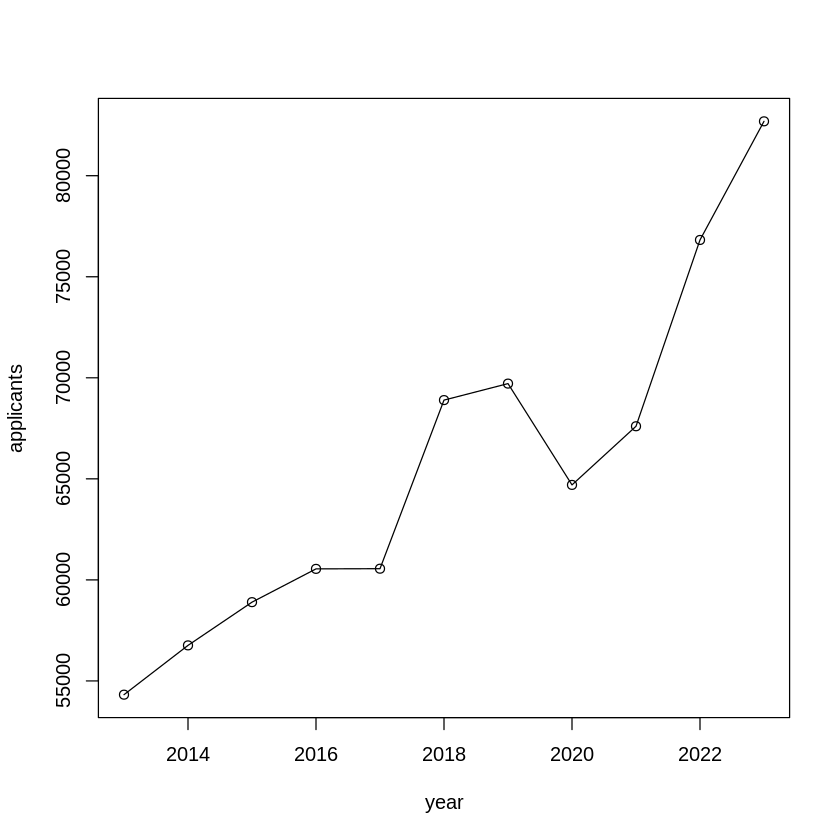

In [73]:
#4.4
year       <- as.numeric(names(cohorts)[2:ncol(cohorts)])
applicants <- as.numeric(gsub(",", "", cohorts[1, 2:ncol(cohorts)]))
plot(year, applicants, type = "o")

**Task 4.4**<br>
* The script above extracts and plots the number of applicants to SDSU over a timeline.
* The number of applicants has steadly went up and has had a sunden up in 2017 and a sundden drop in 2020 , only to start to steadly go up  again.